#  set 3

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 2.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
from google.colab import files
uploaded = files.upload()

Saving PCA and NN Dataset3.csv to PCA and NN Dataset3.csv


In [5]:
# Importing the dataset
dataset = pd.read_csv('PCA and NN Dataset3.csv')
dataset

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42.0,2.0,0.00,1.0,1.0,101348.88,1
1,Hill,608,Spain,Female,41.0,1.0,83807.86,0.0,1.0,112542.58,0
2,Onio,502,France,Female,42.0,8.0,159660.80,1.0,0.0,113931.57,1
3,Boni,699,France,Female,39.0,1.0,0.00,0.0,0.0,93826.63,0
4,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
4498,Obijiaku,771,France,Male,39.0,5.0,0.00,1.0,0.0,96270.64,0
4499,Johnstone,516,France,Male,35.0,10.0,57369.61,1.0,1.0,101699.77,0
4500,Liu,709,France,Female,36.0,7.0,0.00,0.0,1.0,42085.58,1
4501,Sabbatini,772,France,Male,42.0,3.0,75075.31,1.0,0.0,92888.52,1


In [7]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)


(4503, 11)


In [9]:
dataset = dataset.fillna(method='ffill')

In [10]:
dataset.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          4503 non-null   object 
 1   CreditScore      4503 non-null   int64  
 2   Geography        4503 non-null   object 
 3   Gender           4503 non-null   object 
 4   Age              4503 non-null   float64
 5   Tenure           4503 non-null   float64
 6   Balance          4503 non-null   float64
 7   HasCrCard        4503 non-null   float64
 8   IsActiveMember   4503 non-null   float64
 9   EstimatedSalary  4503 non-null   float64
 10  Exited           4503 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 387.1+ KB


In [12]:
types = dataset.dtypes
print(types)

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [13]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000
mean,649.927604,38.826560,5.020431,75956.339667,0.703753,0.520320,99902.006667,0.198312
std,96.378555,10.396125,2.904909,62467.425867,0.456652,0.499642,57555.952747,0.398773
min,350.000000,18.000000,0.000000,0.000000,0.000000,0.000000,90.070000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,0.000000,0.000000,51255.905000,0.000000
50%,651.000000,37.000000,5.000000,96748.890000,1.000000,1.000000,99843.980000,0.000000
75%,717.500000,44.000000,8.000000,127368.980000,1.000000,1.000000,149719.000000,0.000000
max,850.000000,92.000000,10.000000,222267.630000,1.000000,1.000000,199992.480000,1.000000


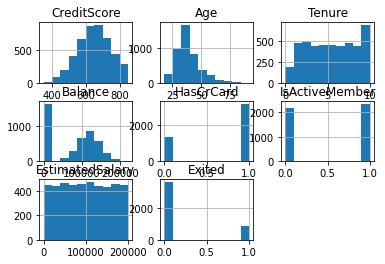

In [14]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

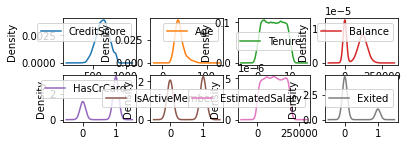

In [15]:
dataset.plot(kind='density' ,subplots=True, layout=(4,4), sharex=False)
pyplot.show()

In [16]:
# Extracting features of dataset

X = dataset.iloc[:, 1:10].values
y = dataset.iloc[:,10].values

In [17]:
# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [18]:
print(X)

[[619 0 0 ... 1.0 1.0 101348.88]
 [608 1 0 ... 0.0 1.0 112542.58]
 [502 0 0 ... 1.0 0.0 113931.57]
 ...
 [709 0 0 ... 0.0 1.0 42085.58]
 [772 0 1 ... 1.0 0.0 92888.52]
 [792 0 0 ... 1.0 0.0 38190.78]]


In [19]:
X.shape

(4503, 9)

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
print(X_train)

[[711 0 1 ... 0.0 0.0 41590.4]
 [569 1 1 ... 1.0 0.0 134272.57]
 [655 0 0 ... 1.0 0.0 64853.51]
 ...
 [699 0 0 ... 1.0 1.0 127429.56]
 [769 0 0 ... 1.0 0.0 147668.64]
 [588 0 0 ... 1.0 0.0 139607.61]]


In [22]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
X_test

array([[350, 0, 0, ..., 0.0, 0.0, 113796.15],
       [807, 0, 0, ..., 1.0, 1.0, 17355.36],
       [651, 0, 0, ..., 1.0, 0.0, 108764.69],
       ...,
       [599, 0, 1, ..., 1.0, 1.0, 174196.68],
       [807, 0, 0, ..., 1.0, 1.0, 130489.37],
       [768, 0, 1, ..., 1.0, 1.0, 8316.19]], dtype=object)

In [24]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [25]:
X_train

array([[711, 0, 1, ..., 0.0, 0.0, 41590.4],
       [569, 1, 1, ..., 1.0, 0.0, 134272.57],
       [655, 0, 0, ..., 1.0, 0.0, 64853.51],
       ...,
       [699, 0, 0, ..., 1.0, 1.0, 127429.56],
       [769, 0, 0, ..., 1.0, 0.0, 147668.64],
       [588, 0, 0, ..., 1.0, 0.0, 139607.61]], dtype=object)

In [26]:
X_test

array([[350, 0, 0, ..., 0.0, 0.0, 113796.15],
       [807, 0, 0, ..., 1.0, 1.0, 17355.36],
       [651, 0, 0, ..., 1.0, 0.0, 108764.69],
       ...,
       [599, 0, 1, ..., 1.0, 1.0, 174196.68],
       [807, 0, 0, ..., 1.0, 1.0, 130489.37],
       [768, 0, 1, ..., 1.0, 1.0, 8316.19]], dtype=object)

In [80]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [51]:
explained_variance

array([5.39403857e-01, 4.60594861e-01, 1.28279529e-06])

In [76]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33333333, 0.33333333, 0.33333333])

In [77]:
print(X_train)

[[-1.05153177 -0.41716976 -1.26838648]
 [-1.31006262  0.72787369  0.55978587]
 [ 1.19846857  0.04547544 -0.45021608]
 ...
 [ 0.49247409 -0.59903519  0.44081298]
 [ 0.57882443 -1.37996814  0.6649341 ]
 [-0.20477061  0.50137081  0.76746028]]


In [78]:
print(X_test)

[[-1.32060469  3.02650797  0.62950342]
 [ 0.18740715 -1.33244288 -1.69802428]
 [ 0.30645479 -0.04601539  0.18748257]
 ...
 [-1.39679141  0.29199971  1.17483749]
 [ 0.43197222 -1.70840806  0.27662828]
 [ 0.28462763 -0.90691095 -1.76445868]]


In [58]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 35)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=35)

In [59]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[564 145]
 [139  53]]


In [61]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 68.48


In [62]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives) 
# calculate Accuracy
#   0   1
# 0[59  7(FP type 1)]
#1 [ 11(FN Type 2) 23]= 82/100
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision))

Precision: 0.268


In [63]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
# calculate Accuracy
#   0   1
# 0[59  7(FP type 1)]
#1 [ 11(FN Type 2) 23]= 82/100
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall))

Recall: 0.276


In [64]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# (2*0.829*0.906)/0.829+0.906
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 27.179


In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
CreditScore =  619#@param {type:"number"}
Geography =  1#@param {type:"number"}
Gender =  1#@param {type:"number"}
Age =  25#@param {type:"number"}
Tenure =  0#@param {type:"number"}
Balance =  163607#@param {type:"number"}
HasCrCard =  1#@param {type:"number"}
IsActiveMember =  1#@param {type:"number"}
EstimatedSalary =  41000#@param {type:"number"}

output= classifier.predict(sc.transform([[Tenure,IsActiveMember,EstimatedSalary]]))
print("Output", output)
if output==[0]:
  print("customer not left the bank")
else:
  print("customer left the bank")

Output [1]
customer left the bank


In [102]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/ML lab/second midterm/decision_model.pkl', 'wb')) 
# Saving model to disk
 

[INFO] Saving model...


In [ ]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/ML lab/second midterm/decision_model.pkl','rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test) 

In [104]:
# save the model to disk
import joblib
filename = '/content/drive/My Drive/finalized_model.sav'
joblib.dump(classifier, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7869034406215316


In [105]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 27.5MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
     |████████████████████████████████| 174kB 51.9MB/s 
     |████████████████████████████████| 112kB 52.3MB/s 
     |████████████████████████████████| 4.2MB 43.5MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 122kB 52.1MB/s 
     |████████████████████████████████| 788kB 38.2MB/s 
     |████████████████████████████████| 368kB 44.7MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=c3cb231664556a1f750f5123606e5c271ebf4b998646120a6e6cd02c3913813f
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ip

In [106]:
# Load the pickled model
import pickle
pickle_in = open("/content/drive/My Drive/ML lab/second midterm/decision_model.pkl","rb")
model=pickle.load(pickle_in)

In [129]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
pickle_in = open("/content/drive/My Drive/ML lab/second midterm/decision_model.pkl","rb")
model=pickle.load(pickle_in)
dataset= pd.read_csv('/content/drive/My Drive/ML lab/second midterm/PCA and NN Dataset3.csv')
X = dataset.iloc[:, 1:10].values
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
def predict_note_authentication(CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary):
  output= model.predict(sc.transform([[Tenure,IsActiveMember,EstimatedSalary]]))
  print("Output", output)
  if output==[0]:
    prediction="customer not left the bank"
  else:
    prediction="customer left the bank"
  print(prediction)
  return prediction
def main():
    st.title("customer left the bank prediction")
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    UserID = st.text_input("UserID","Type Here")
    CreditScore =  st.text_input("CreditScore","Type Here")
    Geography =  st.text_input("Geography","Type Here")
    Gender = st.text_input("Gender","Type Here")
    Age =  st.text_input("Age","Type Here")
    Tenure = st.text_input("Tenure","Type Here")
    Balance =  st.text_input("Balance","Type Here")
    HasCrCard =  st.text_input("HasCrcard","Type Here")
    IsActiveMember = st.text_input("IsActiveMember","Type Here")
    EstimatedSalary =  st.text_input("EstimatedSalary","Type Here")
    resul=""
    if st.button("Predict"):
      result=predict_note_authentication(Tenure,IsActiveMember,EstimatedSalary)
      st.success('Model has predicted {}'.format(result))
    if st.button("About"):
      st.text("Developed by Pritesh Kumar")
      st.text("Student , Department of Computer Engineering")

if __name__=='__main__':
  main()
   

Overwriting app.py


In [130]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [131]:
!pip install pyngrok

In [132]:
!ngrok authtoken 1l8Chfa8ulSrjVty4nEKYRIGimv_434sL7Gi9k1AszUCPjjp1

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [133]:
from pyngrok import ngrok
url=ngrok.connect(port='8080')
url

<NgrokTunnel: "http://aeec7ba3df37.ngrok.io" -> "http://localhost:80">

In [134]:
 !streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.86.202.133:80

2021-07-06 11:39:08.258 Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/script_runner.py", line 349, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 61, in <module>
    main()
  File "/content/app.py", line 54, in main
    result=predict_note_authentication(Tenure,IsActiveMember,EstimatedSalary)
TypeError: predict_note_authentication() missing 6 required positional arguments: 'Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', and 'EstimatedSalary'

  Stopping...


In [135]:
ngrok.kill()